## **Personalized Healthcare Recommendations**


**importing necesasry libraries**


In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()


In [482]:

df = pd.read_csv('./medical data.csv')
df.head()


,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
0,John Doe,15-05-1980,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest"
1,Jane Smith,10-08-1992,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan
2,Michael Lee,20-02-1975,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler
3,Emily Chen,03-11-1988,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration
4,Alex Wong,12-06-2001,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin


In [483]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         241 non-null    object
 1   DateOfBirth  241 non-null    object
 2   Gender       242 non-null    object
 3   Symptoms     247 non-null    object
 4   Causes       245 non-null    object
 5   Disease      249 non-null    object
 6   Medicine     242 non-null    object
dtypes: object(7)
memory usage: 15.8+ KB


In [484]:
df.describe().T


,count,unique,top,freq
Name,241,87,Sophia Koh,9
DateOfBirth,241,98,05-10-1999,8
Gender,242,4,Male,116
Symptoms,247,53,"Fatigue, Weakness",19
Causes,245,62,Food Poisoning,20
Disease,249,68,Gastroenteritis,20
Medicine,242,65,"Rest, Lifestyle",16


In [485]:
df['Gender'].value_counts()


Gender
Male      116
Female    109
Femal      16
br          1
Name: count, dtype: int64

## **EDA**


In [486]:
df['DateOfBirth'] =  pd.to_datetime(df['DateOfBirth'] , format="%d-%m-%Y", errors='coerce' )
type(df['DateOfBirth'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [487]:
from datetime import datetime
df['Age'] = df['DateOfBirth'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)
df['Age'] = df['Age'].astype('Int64')
df.head(1)


,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine,Age
0,John Doe,1980-05-15,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest",45


In [488]:
df['Gender'].replace({"Femal": "Female"} , inplace=True)
df[df['Gender'] == 'br']


C:\Users\Dell\AppData\Local\Temp\ipykernel_14556\2381271641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({"Femal": "Female"} , inplace=True)


,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine,Age
227,NaN,NaT,br,eathing,NaN,NaN,NaN,<NA>


In [489]:
df.drop(227 , axis=0 , inplace=True)
df['Gender'].value_counts()


Gender
Female    125
Male      116
Name: count, dtype: int64

**I am droping all the Null rows because all the records are blank**


In [490]:
df.isnull().sum()


Name           45
DateOfBirth    45
Gender         45
Symptoms       40
Causes         41
Disease        37
Medicine       44
Age            45
dtype: int64

In [491]:
df.dropna(inplace=True)


In [492]:
df.shape


(241, 8)

In [493]:
df.head()


,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine,Age
0,John Doe,1980-05-15,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest",45
1,Jane Smith,1992-08-10,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan,33
2,Michael Lee,1975-02-20,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler,50
3,Emily Chen,1988-11-03,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration,37
4,Alex Wong,2001-06-12,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin,24


## **Visualization**


<Axes: xlabel='Gender', ylabel='count'>

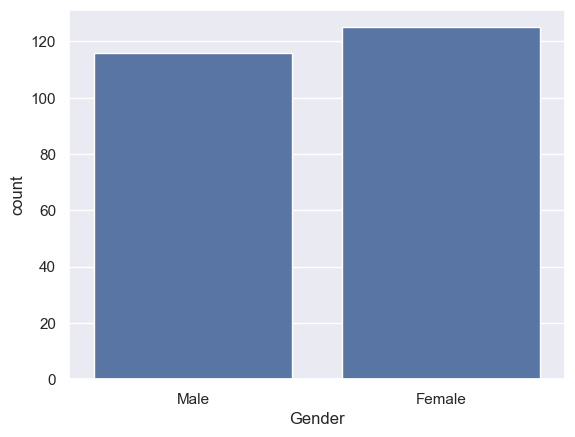

In [494]:
sns.countplot(x = 'Gender', data = df)


In [495]:
df.columns


Index(['Name', 'DateOfBirth', 'Gender', 'Symptoms', 'Causes', 'Disease',
       'Medicine', 'Age'],
      dtype='object')

In [496]:
df['Symptoms'].value_counts()


Symptoms
Fatigue, Weakness                  19
Fever, Chills                      13
Nausea, Vomiting                   11
Headache, Blurred Vision           11
Nausea, Dizziness                  11
Fever, Sore Throat                 10
Stomach Pain, Diarrhea             10
Muscle Pain, Fatigue               10
Itching, Redness                   10
Joint Pain, Swelling                9
Chest Pain, Shortness of breath     9
Shortness of breath                 8
Back Pain, Numbness                 8
Joint Pain, Fatigue                 7
Abdominal Pain, Bloating            7
Anxiety, Palpitations               7
Headache, Sensitivity               5
Dizziness, Fatigue                  5
Nausea, Cramps                      5
Chest Pain, Shortness               5
Cough, Shortness of breath          5
Cough, Fever                        5
Skin Rash, Itching                  4
Fatigue, Difficulty breathing       4
Anxiety, Rapid Heartbeat            4
e Fatigue, Weakness                 3
Cou

## **Top 10 Common Symptoms**

In [497]:
symptoms_series = df['Symptoms'].str.split(",").explode()
for i in symptoms_series:
    print(i)

Fever
 Cough
Headache
 Fatigue
Shortness of breath
Nausea
 Vomiting
Sore Throat
Joint Pain
 Fatigue
Chest Pain
 Dizziness
Itching
 Redness
Abdominal Pain
 Bloating
Fatigue
 Sadness
Fever
 Muscle Aches
Cough
 Sneezing
Nausea
 Dizziness
Shortness of breath
Headache
 Blurred Vision
Stomach Pain
 Diarrhea
Joint Pain
 Swelling
Fever
 Sore Throat
Back Pain
 Numbness
Nausea
 Vomiting
Fatigue
 Weakness
Anxiety
 Rapid Heartbeat
Shortness of breath
Skin Rash
 Itching
Cough
 Fever
Joint Pain
 Fatigue
Dizziness
 Fatigue
Headache
 Sensitivity
Abdominal Pain
 Bloating O
Nausea
 Cramps
Chest Pain
 Shortness of breath
Fatigue
 Difficulty breathing
Fever
 Chills
Cough
 Shortness of breath
Itching
 Redness
Muscle Pain
 Fatigue
Nausea
 Vomiting
Headache
 Blurred Vision
Stomach Pain
 Diarrhea
Back Pain
 Numbness
Fever
 Sore Throat
Fatigue
 Weakness
Anxiety
 Palpitations
Chest Pain
 Shortness of breath
Joint Pain
 Swelling
Nausea
 Dizziness
Fever
 Cough
Headache
 Fatigue
Shortness of breath
Nausea
 Vomitin

In [498]:
symptoms_series = [i.strip().replace("e ", "") for i in symptoms_series if "e " in i]
print(symptoms_series)

['SorThroat', 'MusclAches', 'SorThroat', 'MusclPain', 'SorThroat', 'SorThroat', 'MusclPain', 'SorThroat', 'MusclPain', 'SorThroat', 'Itching', 'MusclPain', 'SorThroat', 'Joint Pain', 'Fatigue', 'Cough', 'Itching', 'MusclPain', 'Nausea', 'Back Pain', 'SorThroat', 'Fatigue', 'Anxiety', 'Joint Pain', 'Fatigue', 'SorThroat', 'MusclPain', 'SorThroat', 'MusclPain', 'SorThroat', 'SorThroat', 'MusclPain', 'SorThroat', 'MusclPain', 'SorThroat', 'SorThroat', 'MusclPain']


In [499]:
df['Symptoms'] = df['Symptoms'].str.split(", ")

In [500]:
df.head()

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine,Age
0,John Doe,1980-05-15,Male,"[Fever, Cough]",Viral Infection,Common Cold,"Ibuprofen, Rest",45
1,Jane Smith,1992-08-10,Female,"[Headache, Fatigue]",Stress,Migraine,Sumatriptan,33
2,Michael Lee,1975-02-20,Male,[Shortness of breath],Pollution,Asthma,Albuterol Inhaler,50
3,Emily Chen,1988-11-03,Female,"[Nausea, Vomiting]",Food Poisoning,Gastroenteritis,Oral Rehydration,37
4,Alex Wong,2001-06-12,Male,[Sore Throat],Bacterial Infection,Strep Throat,Penicillin,24


In [501]:
new_symptoms = []
for i in df['Symptoms']:
    new_list = []
    for j in i:
        j = j.strip()
        if "e " in j:
            new_list.append(j.replace("e ", ""))
        else:
            new_list.append(j)
    new_symptoms.append(new_list)

df['Symptoms'] = new_symptoms

In [502]:
df['Symptoms'] = df['Symptoms'].apply(lambda x: ", ".join(x))

In [503]:
df.head()

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine,Age
0,John Doe,1980-05-15,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest",45
1,Jane Smith,1992-08-10,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan,33
2,Michael Lee,1975-02-20,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler,50
3,Emily Chen,1988-11-03,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration,37
4,Alex Wong,2001-06-12,Male,SorThroat,Bacterial Infection,Strep Throat,Penicillin,24


In [504]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

In [505]:
symptoms = df['Symptoms'].str.split(',', expand=True)
symptoms_encoded = pd.get_dummies(symptoms, prefix='')
symptoms_encoded.columns = [col.replace('_', '').replace(' ', '', 1) for col in symptoms_encoded.columns]
df = pd.concat([df, symptoms_encoded], axis=1)
df = df.drop('Symptoms', axis=1)

In [506]:
df.columns

Index(['Name', 'DateOfBirth', 'Gender', 'Causes', 'Disease', 'Medicine', 'Age',
       'AbdominalPain', 'Anxiety', 'BackPain', 'ChestPain', 'Cough',
       'Dizziness', 'Fatigue', 'Fever', 'Headache', 'Itching', 'JointPain',
       'MusclPain', 'Nausea', 'Shortnessof breath', 'SkinRash', 'SorThroat',
       'StomachPain', 'Bloating', 'Bloating O', 'Blurred Vision', 'Chills',
       'Cough', 'Cramps', 'Diarrhea', 'Difficulty', 'Difficulty breathing',
       'Dizziness', 'Fatigue', 'Fever', 'Itching', 'MusclAches', 'Numbness',
       'Palpitations', 'Rapid Heartbeat', 'Redness', 'Sadness', 'Sensitivity',
       'Shortness', 'Shortness of brea', 'Shortness of breat',
       'Shortness of breath', 'Shortnessof breath', 'Sneezing', 'SorThroat',
       'Swelling', 'Vomiting', 'Weakness'],
      dtype='object')

In [507]:
disease_medicine_map = df.groupby('Disease')['Medicine'].apply(lambda x: x.value_counts().index[0]).to_dict()
disease_causes_map = df.groupby('Disease')['Causes'].apply(lambda x: x.value_counts().index[0]).to_dict()

In [508]:
disease_causes_map['Chronic Bronchitis']

'Smoking'

In [509]:
x = df.drop(['Name', 'DateOfBirth', 'Causes', 'Disease', 'Medicine'], axis=1)
y = df['Disease']

In [510]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [511]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [512]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6530612244897959


In [514]:
def predict_disease_and_treatment(symptoms, age, gender):
    # Create a new dataframe with the input data
    new_data = pd.DataFrame({'Age': [age], 'Gender': [gender]})
    new_data = pd.get_dummies(new_data, columns=['Gender'])
    
    # One-hot encode the symptoms
    symptoms_encoded = pd.get_dummies(pd.Series(symptoms), prefix='')
    symptoms_encoded = symptoms_encoded.loc[:, (symptoms_encoded != 0).any(axis=0)]
    
    # Concatenate the new data with the symptoms
    new_data = pd.concat([new_data, symptoms_encoded], axis=1)
    
    # Fill in missing columns with zeros
    for col in x_train.columns:
        if col not in new_data.columns:
            new_data[col] = 0
    
    # Reorder the columns to match the training data
    new_data = new_data[x_train.columns]
    
    # Predict the disease
    disease_pred = rf.predict(new_data)
    
    # Convert the numpy array to a string
    disease_pred = str(disease_pred[0])
    
    # Check if the predicted disease is a valid key
    if disease_pred in disease_medicine_map:
        medicine_pred = disease_medicine_map[disease_pred]
    else:
        medicine_pred = "Unknown"
        
    if disease_pred in disease_causes_map:
        causes_pred = disease_causes_map[disease_pred]
    else:
        causes_pred = "Unknown"
    
    return disease_pred, medicine_pred, causes_pred

# Example usage:
symptoms = ['Cough', 'Fever']
age = 25
gender = 0
disease, medicine, causes = predict_disease_and_treatment(symptoms, age, gender)
print("Predicted Disease:", disease)
print("Predicted Medicine:", medicine)
print("Predicted Causes:", causes)

Predicted Disease: Chronic Bronchitis
Predicted Medicine: Inhalers
Predicted Causes: Smoking


array(['RespiratoryInfection', 'Hypertension', 'Strep Throat',
       'Allergic Reaction', 'COVID-19', 'Muscle Overuse',
       'Gastroenteritis', 'Chronic Fatigue', 'Major Depressive Disorder',
       'Anxiety Disorder', 'Motion Sickness', 'COVID-19', 'Sleep Apnea',
       'Muscle Strain', 'Herniated Disc', 'Menstrual Cramps',
       'Tension Headache', 'Gastroenteritis', 'Gastroenteritis',
       'Chronic Fatigue Syndrome', 'COVID-19', 'Gastroenteritis',
       'Vision Fatigue', 'Coronary Artery', 'Respiratory Infection',
       'Tonsillitis', 'Common Cold', 'Motion Sickness', 'Sleep Apnea',
       'Herniated Disc', 'Tonsillitis', 'Chronic Fatigue Syndrome',
       'Arthritis', 'Pneumonia', 'Herniated Disc', 'Tonsillitis',
       'Arthritis', 'Muscle Strain', 'Sleep Apnea', 'Muscle Strain',
       'Pneumonia', 'Chronic Fatigue Syndrome',
       'Chronic Fatigue Syndrome', 'Arthritis', 'Allergic Reaction',
       'Herniated Disc', 'Respiratory Infection', 'Gastroenteritis',
       'St